<a href="https://colab.research.google.com/github/soumitrahazra/My_Data_Analysis_Codes/blob/main/Sunspot_Area_TimeSeries_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Sunspot Area time series data analysis. We have used the calibrated sunspot area time series data obtained from http://www2.mps.mpg.de/projects/sun-climate/data/indivi_group_area_1874_2023_Mandal.txt

In [104]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import time
import math
import pandas as pd
# import seaborn as sns
from scipy import special
from scipy.signal import find_peaks
import datetime
import csv
import scipy.stats
import matplotlib
from scipy.optimize import curve_fit
import seaborn as sns
from scipy.interpolate import interp1d
from astropy.time import Time

# import subprocess
# import cv2
# import glob
# import re
# from mpl_toolkits.mplot3d import axes3d
# from matplotlib import rc
# import matplotlib.style
#plt.ion()
## Plotting canvas properties.
params = {'legend.fontsize': 16,
          'axes.labelsize': 16,
          'axes.titlesize': 16,
          'xtick.labelsize' :15,
          'ytick.labelsize': 15,
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5,
          'mathtext.fontset' : 'stix',
          'mathtext.rm'      : 'DejaVu serif',
          'font.family'      : 'DejaVu serif',
          'font.serif'       : "Times New Roman", # or "Times"
         }
matplotlib.rcParams.update(params)

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls

drive/  sample_data/


In [47]:
dfa=np.loadtxt('/content/drive/MyDrive/Sunspot_Data/daily_total_sunspot_area_1874_2023_Mandal.txt', skiprows=73)
dfa

array([[1.874e+03, 6.000e+00, 1.000e+00, ..., 1.000e+00, 1.420e-02,
        1.000e+00],
       [1.874e+03, 6.000e+00, 2.000e+00, ..., 1.000e+00, 1.680e-02,
        1.000e+00],
       [1.874e+03, 6.000e+00, 3.000e+00, ..., 1.000e+00, 1.530e-02,
        1.000e+00],
       ...,
       [2.023e+03, 9.000e+00, 1.700e+01, ..., 2.000e+00, 2.600e-02,
        2.000e+00],
       [2.023e+03, 9.000e+00, 1.800e+01, ..., 2.000e+00, 3.820e-02,
        2.000e+00],
       [2.023e+03, 9.000e+00, 1.900e+01, ..., 2.000e+00, 6.620e-02,
        2.000e+00]])

In [48]:
df=pd.DataFrame(dfa)
df.columns=['Year', 'Month', 'Day', 'Projected Area', 'Obs1', 'Corrected Area', 'Obs2', 'PSI', 'Obs3']

In [49]:
df

,Year,Month,Day,Projected Area,Obs1,Corrected Area,Obs2,PSI,Obs3
0,1874.0,6.0,1.0,468.00,1.0,313.00,1.0,0.0142,1.0
1,1874.0,6.0,2.0,580.00,1.0,392.00,1.0,0.0168,1.0
2,1874.0,6.0,3.0,539.00,1.0,375.00,1.0,0.0153,1.0
3,1874.0,6.0,4.0,468.00,1.0,358.00,1.0,0.0132,1.0
4,1874.0,6.0,5.0,361.00,1.0,340.00,1.0,0.0104,1.0
...,...,...,...,...,...,...,...,...,...
53386,2023.0,9.0,15.0,821.10,2.0,480.20,2.0,0.0252,2.0
53387,2023.0,9.0,16.0,1041.42,2.0,626.22,2.0,0.0336,2.0
53388,2023.0,9.0,17.0,911.88,2.0,831.04,2.0,0.0260,2.0
53389,2023.0,9.0,18.0,1395.36,2.0,1159.34,2.0,0.0382,2.0


In [50]:
#Converting year, month and day in datetime format

date=pd.to_datetime(df.Year*10000+df.Month*100+df.Day, format='%Y%m%d')

In [55]:
#Modifying the dataset
dataset=df
dataset=dataset.drop(columns=['Year','Month','Day', 'Obs1', 'Obs2', 'Obs3'])
dataset.insert(0,'Date',date)

In [52]:
dataset

,Date,Projected Area,Corrected Area,PSI
0,1874-06-01,468.00,313.00,0.0142
1,1874-06-02,580.00,392.00,0.0168
2,1874-06-03,539.00,375.00,0.0153
3,1874-06-04,468.00,358.00,0.0132
4,1874-06-05,361.00,340.00,0.0104
...,...,...,...,...
53386,2023-09-15,821.10,480.20,0.0252
53387,2023-09-16,1041.42,626.22,0.0336
53388,2023-09-17,911.88,831.04,0.0260
53389,2023-09-18,1395.36,1159.34,0.0382


Next we have to generate the monthly averaged dataset
Our date/time column in the dataframe is not in index format.
Before generating monthly averaged dataset, we have to convert the date column in index format
#dataset_monthly=dataset.set_index('Date').resample('1M').*mean*

In [56]:
dataset.set_index('Date',inplace=True)
dataset.index = pd.to_datetime(dataset.index)

dataset_monthly=dataset.resample('1ME').mean()
monthly_dataset=dataset_monthly.reset_index()

In [79]:
#monthly_dataset
mm=monthly_dataset.to_numpy()
mm[:,0][2]-mm[:,0][1]

Timedelta('31 days 00:00:00')

In [121]:
times=monthly_dataset['Date']
monthly_sunspot_areas= monthly_dataset['Corrected Area']

We have to now generate 13 month smoothed data set. Calculate moving average with a window size of 13

In [122]:
sunspot_area_smootheds = monthly_sunspot_areas.rolling(window=13).mean()

We now want to convert time into fractional year

In [123]:
#Convertig time into the fractional year (using Time function of astropy)
timep=times.to_numpy()
tm=Time(timep)
time= tm.decimalyear
sunspot_area_smoothed= sunspot_area_smootheds.to_numpy()

/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1026 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1026 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1027 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1015 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


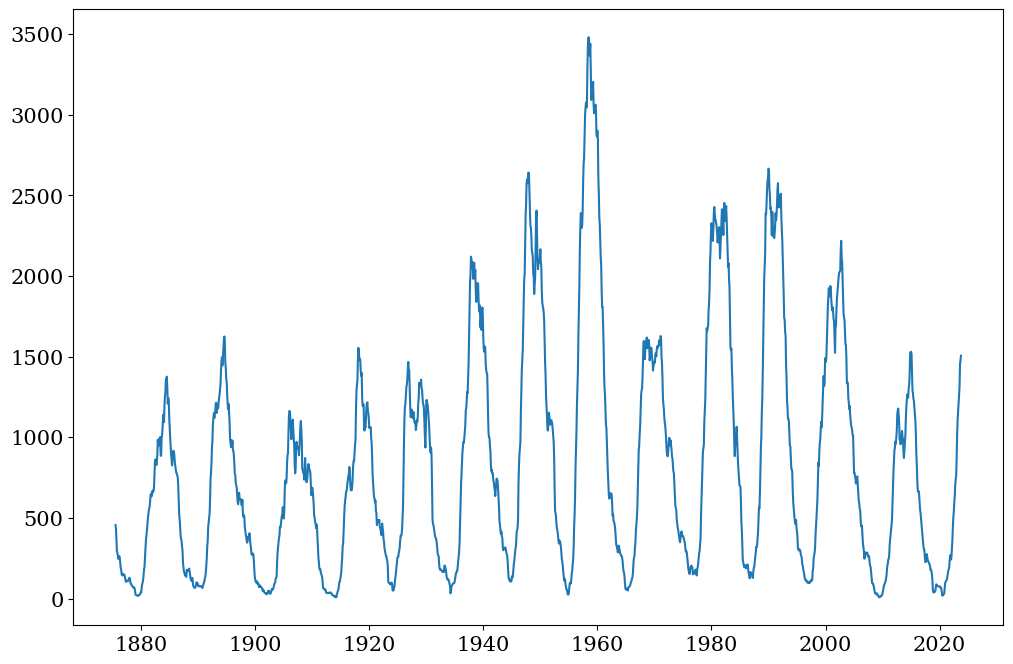

In [124]:
plt.plot(time, sunspot_area_smoothed)

In [125]:
time

array([1874.49315068, 1874.57808219, 1874.6630137 , ..., 2023.57808219,
       2023.6630137 , 2023.74520548])

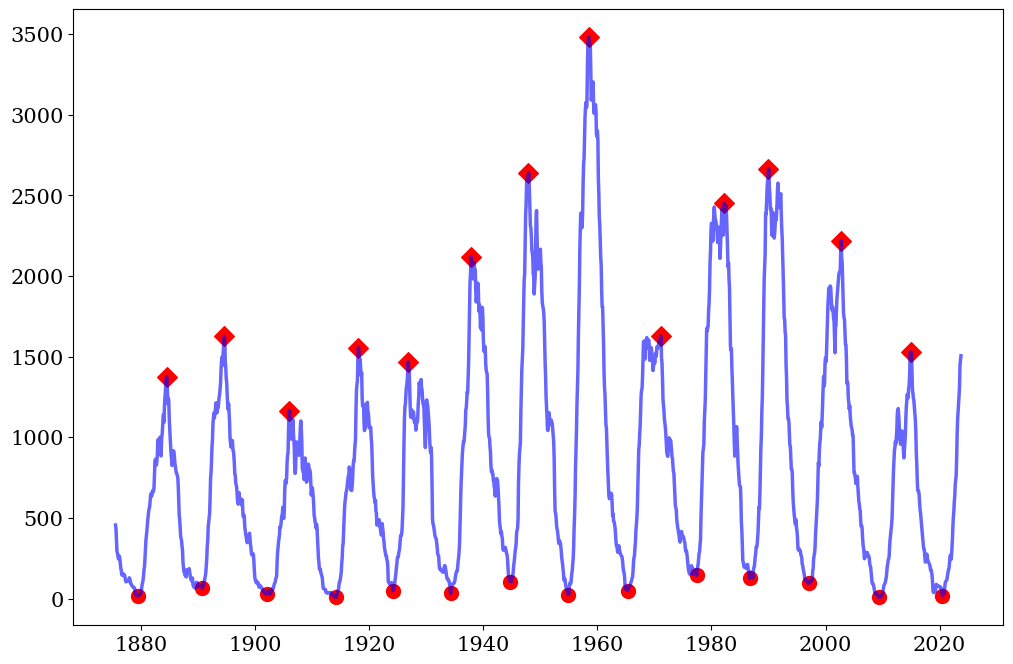

In [126]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(time,sunspot_area_smoothed,linewidth = 2.5, alpha=0.6, color='blue', linestyle='-')

peaks1 = find_peaks(sunspot_area_smoothed, height = 500, distance = 80)
height1 = peaks1[1]['peak_heights'] #list containing the height of the peaks
peak_pos1 = time[peaks1[0]]   #list containing the positions of the peaks
plt.scatter(peak_pos1, height1, color = 'r', s = 100, marker = 'D')

peaks2 = find_peaks(-np.abs(sunspot_area_smoothed), height = -500, distance = 80)
height2 = peaks2[1]['peak_heights'] #list containing the height of the peaks
peak_pos2 = time[peaks2[0]]   #list containing the positions of the peaks
plt.scatter(peak_pos2, -height2, color = 'r', s = 400, marker = '.')

In [127]:
peak_pos1, peak_pos2

(array([1884.49453552, 1894.57808219, 1905.99726027, 1918.08219178,
        1926.83013699, 1937.83013699, 1947.91232877, 1958.49315068,
        1971.08219178, 1982.24383562, 1989.99726027, 2002.74520548,
        2014.99726027]),
 array([1879.49315068, 1890.74520548, 1901.99726027, 1914.15890411,
        1924.16120219, 1934.24383562, 1944.66393443, 1954.83013699,
        1965.3260274 , 1977.4109589 , 1986.74520548, 1997.15890411,
        2009.4109589 , 2020.49453552]))

In [128]:
peak_rise1=peak_pos1[0:len(peak_pos1)]
peak_rise2=peak_pos2[0:(len(peak_pos2)-1)]
peak_rise1.shape, peak_rise2.shape

((13,), (13,))

In [129]:
peak_decay1=peak_pos1[0:len(peak_pos1)]
peak_decay2=peak_pos2[1:len(peak_pos2)]
peak_decay1.shape, peak_decay2.shape

((13,), (13,))

In [130]:
t_rise=peak_rise1-peak_rise2
t_decay=abs(peak_decay1-peak_decay2)
total_cycle_length=t_rise+t_decay
t_rise, t_decay, total_cycle_length

(array([5.00138483, 3.83287671, 4.        , 3.92328767, 2.6689348 ,
        3.58630137, 3.24839434, 3.6630137 , 5.75616438, 4.83287671,
        3.25205479, 5.58630137, 5.58630137]),
 array([6.25066996, 7.41917808, 8.16164384, 6.0790104 , 7.41369863,
        6.83379744, 6.91780822, 6.83287671, 6.32876712, 4.50136986,
        7.16164384, 6.66575342, 5.49727525]),
 array([11.25205479, 11.25205479, 12.16164384, 10.00229808, 10.08263343,
        10.42009881, 10.16620256, 10.49589041, 12.08493151,  9.33424658,
        10.41369863, 12.25205479, 11.08357662]))

In [131]:
cycle_number = np.array(list(range(12,len(t_rise)+12,1)))
print(cycle_number)

[12 13 14 15 16 17 18 19 20 21 22 23 24]


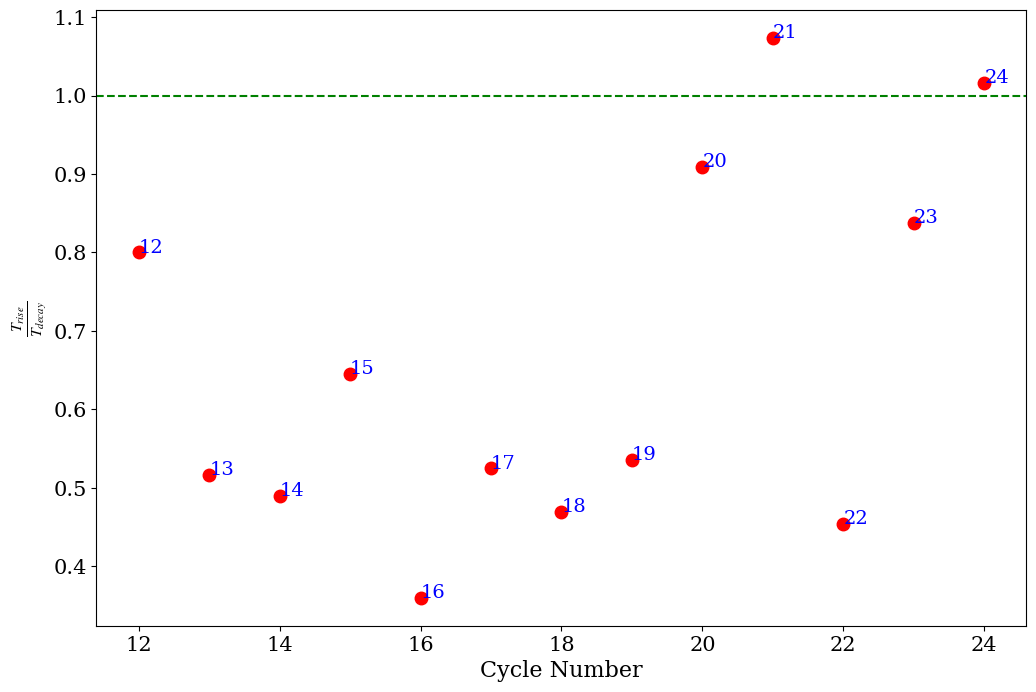

In [132]:
plt.plot(cycle_number, t_rise/t_decay, marker = 'o', ls = ' ', color = 'red', markersize = 9)
plt.axhline(y=1.0, color='g', linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y in zip(cycle_number, t_rise/t_decay):
    plt.text(x, y, str(x), color="blue", fontsize=14)

plt.xlabel('Cycle Number')
plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('figa1.png', bbox_inches='tight')

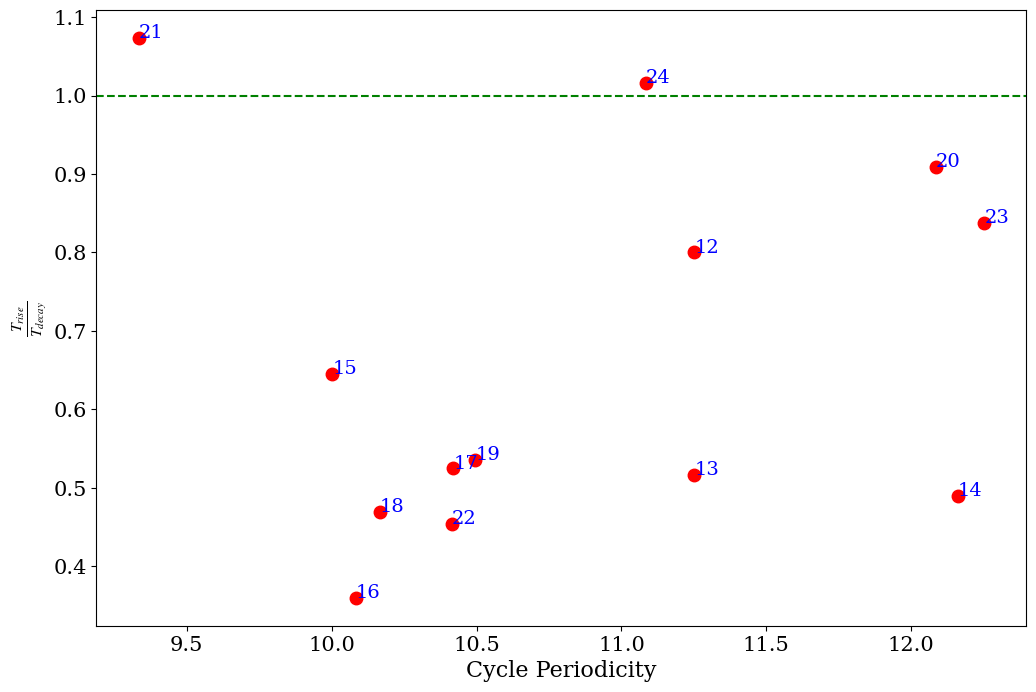

In [133]:
plt.plot(total_cycle_length, t_rise/t_decay, marker = 'o', ls = ' ', color = 'red', markersize = 9)
plt.axhline(y=1.0, color='g', linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y, z in zip(total_cycle_length, t_rise/t_decay, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)

plt.xlabel('Cycle Periodicity')
plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('figa1aw.png', bbox_inches='tight')

In [134]:
first_quart, second_quart, third_quart = np.percentile(t_rise/t_decay, np.arange(25, 100, 25)) # quartiles

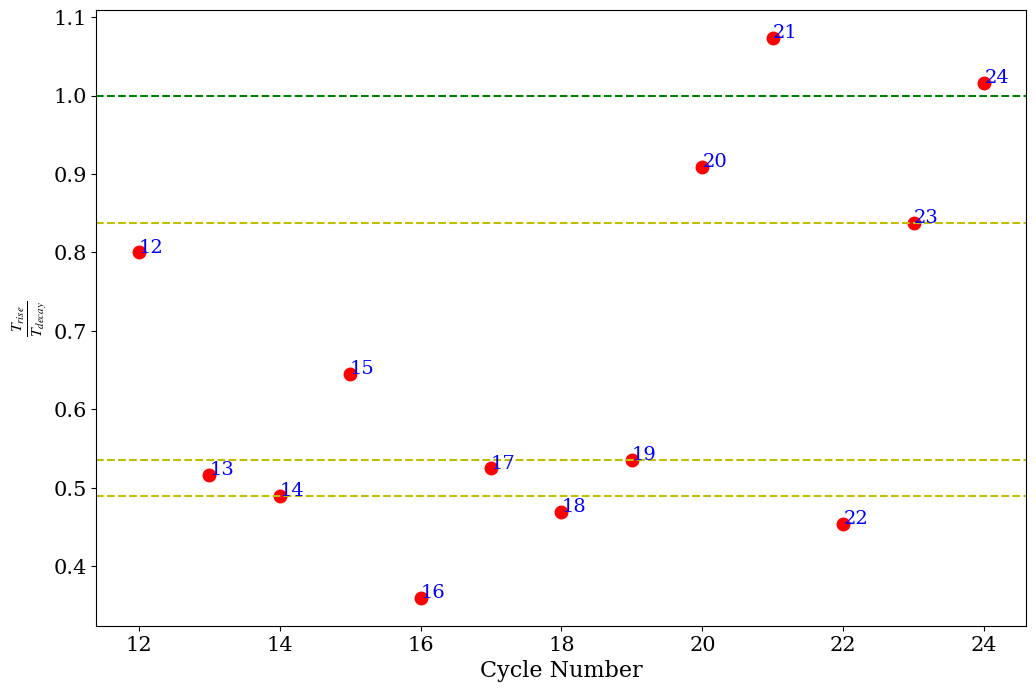

In [135]:
plt.plot(cycle_number, t_rise/t_decay, marker = 'o', ls = ' ', color = 'red', markersize = 9)
plt.axhline(y=1.0, color='g', linestyle='--')
plt.axhline(y=first_quart, color='y', linestyle='--')
plt.axhline(y=second_quart, color='y', linestyle='--')
plt.axhline(y=third_quart, color='y',linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y in zip(cycle_number, t_rise/t_decay):
    plt.text(x, y, str(x), color="blue", fontsize=14)

plt.xlabel('Cycle Number')
plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('figaf.png', bbox_inches='tight')

In [136]:
cycle_amplitude=height1
cycle_amplitude

array([1375.64278075, 1624.96801371, 1163.71475245, 1554.24566938,
       1466.9743767 , 2119.50661704, 2641.4057072 , 3480.14844027,
       1627.49665603, 2453.35927709, 2665.5690488 , 2217.85316023,
       1529.31901572])

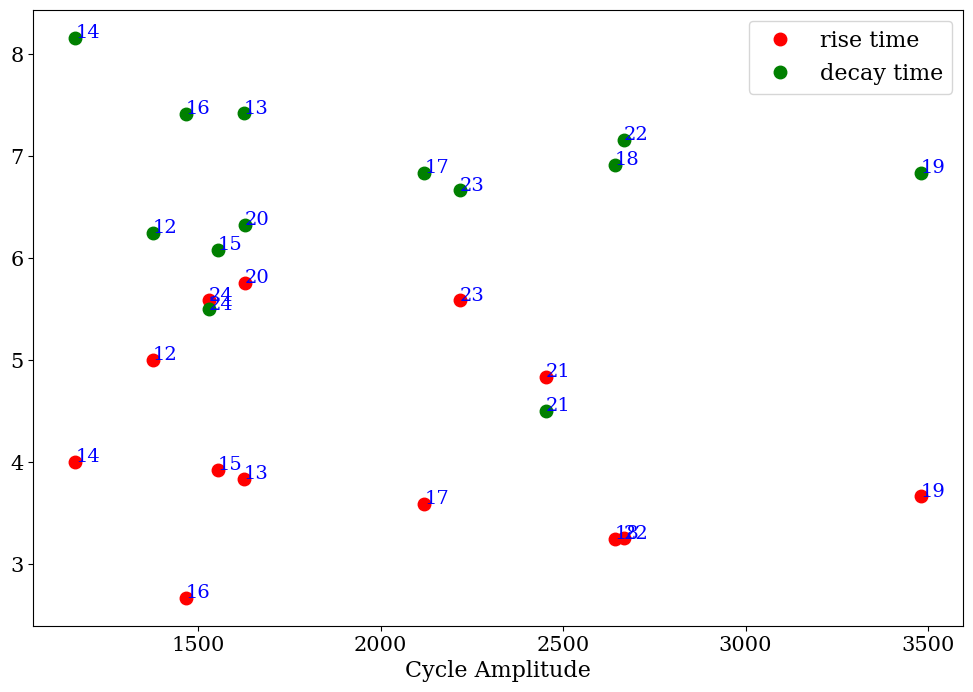

In [137]:
plt.plot(cycle_amplitude, t_rise, marker = 'o', ls='', color = 'red', markersize = 9, label='rise time')
plt.plot(cycle_amplitude, t_decay, marker='o', ls='', color='green', markersize=9, label='decay time')
#plt.scatter(cycle_amplitude, t_rise, label='rise time')
plt.legend()
#plt.axhline(y=1.0, color='g', linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y, z in zip(cycle_amplitude, t_rise, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)

for x, y, z in zip(cycle_amplitude, t_decay, cycle_number):
    plt.text(x, y, str(z), color='blue', fontsize=14)

#plt.gca().set_facecolor('white')
plt.xlabel('Cycle Amplitude')
#plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('figa1awsa.png', bbox_inches='tight')

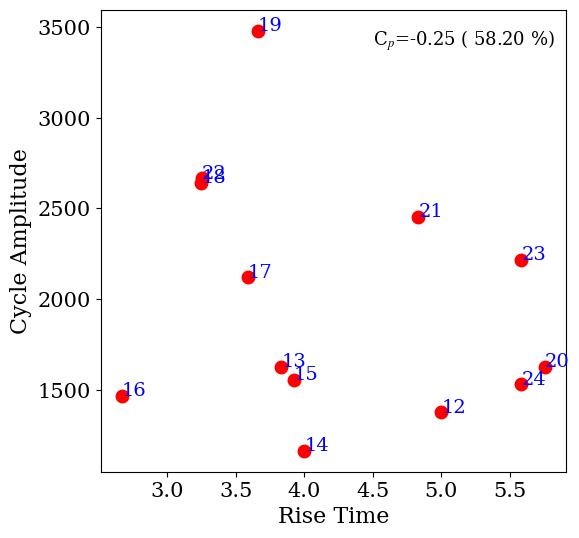

In [141]:
rr, pp = sp.stats.pearsonr(t_rise, cycle_amplitude)
#print(f"Pearson's correlation coefficient = {r : 0.3f} ({(1 - p) * 100 : 0.3f} %)")

plt.figure(figsize = (6, 6))
plt.plot(t_rise, cycle_amplitude, marker = 'o', ls='', color = 'red', markersize = 9)
#plt.text(10, 87, f'C$_p$={r : 0.2f} ({(1 - p) * 100 : 0.2f} %)', fontsize = 13)
for x, y, z in zip(t_rise, cycle_amplitude, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)
plt.xlabel('Rise Time')
plt.ylabel('Cycle Amplitude')
plt.text(4.5, 3400, f'C$_p$={rr : 0.2f} ({(1 - pp) * 100 : 0.2f} %)', fontsize = 13)
plt.show()

In [142]:
peaks1 = find_peaks(sunspot_area_smoothed, height = 500, distance = 80)
height1 = peaks1[1]['peak_heights'] #list containing the height of the peaks (maximum of the signal)

max_position = time[peaks1[0]]   #list containing the positions of the peaks
max_position_index=peaks1[0]

peaks2 = find_peaks(-np.abs(sunspot_area_smoothed), height = -500, distance = 80)
height2 = peaks2[1]['peak_heights'] #list containing the height of the peaks (minimum of the signal)
min_position = time[peaks2[0]]   #list containing the positions of the peaks
min_position_index=peaks2[0]

In [143]:
#Next, we calculate the rise rate of the sunspot cycle by taking the maximum and minimum values of the solar cycle.
nums=len(max_position)
m_ssn=np.zeros(nums)
c_ssn=np.zeros(nums)
for n in range(nums):
  time_cyc= time[min_position_index[n]:max_position_index[n]]
  cycleamp_cyc= sunspot_area_smoothed[min_position_index[n]:max_position_index[n]]
  deg=1
  fit_ss=np.polyfit(time_cyc, cycleamp_cyc, deg)
  m_ssn[n]=fit_ss[0] #Gradient
  c_ssn[n]=fit_ss[1] #Intercept

m_ssn, c_ssn


(array([ 270.93385519,  438.0197276 ,  257.1930176 ,  333.1933252 ,
         561.61647153,  544.52405879,  904.75084116, 1107.0330098 ,
         320.82887764,  520.06056858,  872.47847461,  397.25792858,
         281.65322334]),
 array([ -509247.68415957,  -828144.90314802,  -489335.97160564,
         -637840.59346197, -1080814.63109769, -1053509.30386706,
        -1759826.00201559, -2164502.34241642,  -630381.95351894,
        -1027971.54576053, -1733813.67140453,  -793255.6572409 ,
         -566043.69037896]))

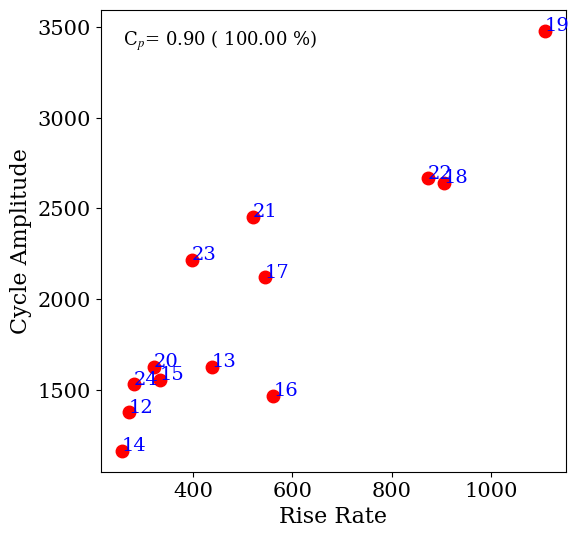

In [147]:
rise_rate= m_ssn

rf, pf = sp.stats.pearsonr(rise_rate, cycle_amplitude)
#print(f"Pearson's correlation coefficient = {r : 0.3f} ({(1 - p) * 100 : 0.3f} %)")

plt.figure(figsize = (6, 6))
plt.plot(rise_rate, cycle_amplitude, marker = 'o', ls='', color = 'red', markersize = 9)
#plt.text(10, 87, f'C$_p$={r : 0.2f} ({(1 - p) * 100 : 0.2f} %)', fontsize = 13)
for x, y, z in zip(rise_rate, cycle_amplitude, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)
plt.xlabel('Rise Rate')
plt.ylabel('Cycle Amplitude')
plt.text(260, 3400, f'C$_p$={rf : 0.2f} ({(1 - pf) * 100 : 0.2f} %)', fontsize = 13)
plt.show()

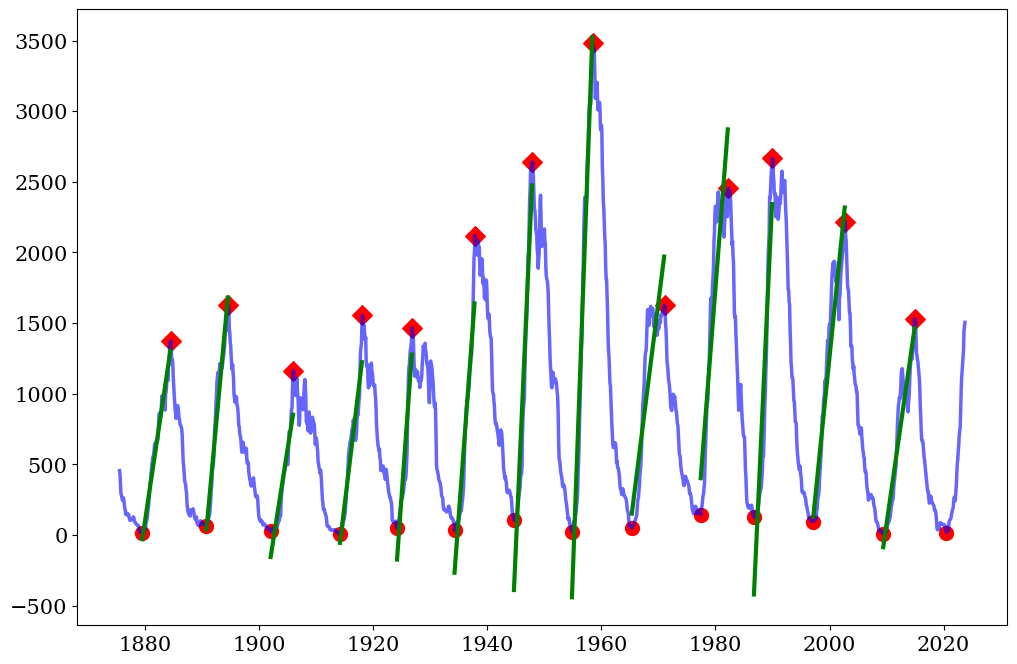

In [155]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(time,sunspot_area_smoothed,linewidth = 2.5, alpha=0.6, color='blue', linestyle='-')

peaks1 = find_peaks(sunspot_area_smoothed, height = 500, distance = 80)
height1 = peaks1[1]['peak_heights'] #list containing the height of the peaks
peak_pos1 = time[peaks1[0]]   #list containing the positions of the peaks
plt.scatter(peak_pos1, height1, color = 'r', s = 100, marker = 'D')

peaks2 = find_peaks(-np.abs(sunspot_area_smoothed), height = -500, distance = 80)
height2 = peaks2[1]['peak_heights'] #list containing the height of the peaks
peak_pos2 = time[peaks2[0]]   #list containing the positions of the peaks
plt.scatter(peak_pos2, -height2, color = 'r', s = 400, marker = '.')


nums=len(max_position)
for n in range(nums):
  time_cyc= time[min_position_index[n]:max_position_index[n]]
  cycleamp_cyc= sunspot_area_smoothed[min_position_index[n]:max_position_index[n]]
  deg=1
  fit_ss=np.polyfit(time_cyc, cycleamp_cyc, deg)
  model_ss= fit_ss[0]*time_cyc + fit_ss[1]
  plt.plot(time_cyc, model_ss, linewidth = 3, c='g')

In [148]:
#Calculating the Decay Rate of the sunspot cycle.
#We took the end point of the cycle minima and take the data one or two year before the minima and calculate the slope to get the decay rate.

cycle_end_minima_index=peaks2[0][1:14]
cycle_end_minima_index

array([ 195,  330,  476,  596,  717,  842,  964, 1090, 1235, 1347, 1472,
       1619, 1752])

In [149]:
nums=len(max_position)
md_ssn=np.zeros(nums)
cd_ssn=np.zeros(nums)
for n in range(nums):
  time_cycd= time[(cycle_end_minima_index[n]-36):(cycle_end_minima_index[n]-12)]
  cycleamp_cycd= sunspot_area_smoothed[(cycle_end_minima_index[n]-36):(cycle_end_minima_index[n]-12)]
  deg=1
  fit_ssd=np.polyfit(time_cycd, cycleamp_cycd, deg)
  md_ssn[n]=fit_ssd[0] #Gradient
  cd_ssn[n]=fit_ssd[1] #Intercept

In [150]:
decay_rate=md_ssn
decay_rate_previous= decay_rate[0:(len(decay_rate)-1)]
next_cycle_amplitude= cycle_amplitude[1:len(cycle_amplitude)]
decay_time_previous=t_decay[0:(len(t_decay)-1)]

In [151]:
rd, pd = sp.stats.pearsonr(decay_rate_previous, next_cycle_amplitude)
print(f"Pearson's correlation coefficient = {rd : 0.3f} ({(1 - pd) * 100 : 0.3f} %)")

Pearson's correlation coefficient = -0.783 ( 99.741 %)


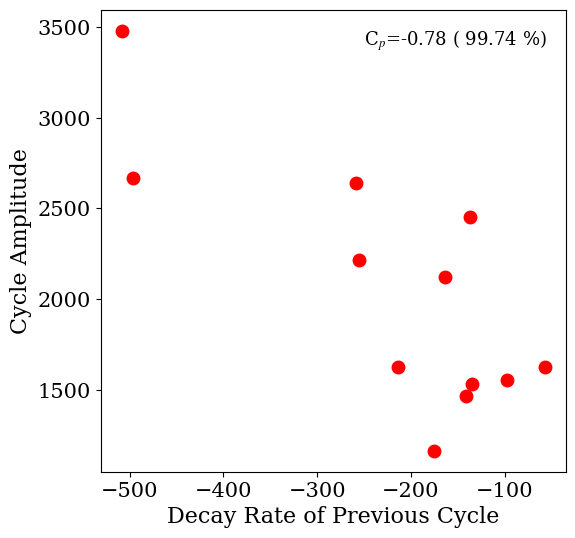

In [154]:
plt.figure(figsize = (6, 6))
plt.plot(decay_rate_previous, next_cycle_amplitude, marker = 'o', ls='', color = 'red', markersize = 9)
#plt.text(10, 87, f'C$_p$={r : 0.2f} ({(1 - p) * 100 : 0.2f} %)', fontsize = 13)
#for x, y, z in zip(rise_rate, cycle_amplitude, cycle_number):
#    plt.text(x, y, str(z), color="blue", fontsize=14)
plt.xlabel('Decay Rate of Previous Cycle')
plt.ylabel('Cycle Amplitude')
plt.text(-250, 3400, f'C$_p$={rd : 0.2f} ({(1 - pd) * 100 : 0.2f} %)', fontsize = 13)
plt.show()